In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import iqr


In [2]:
div_df_orginal = pd.read_csv('dividend_stocks_only.csv')

In [3]:
div_df = div_df_orginal.copy()

In [4]:
div_df.head()

,symbol,security_name,listing_exchange,etf,financial_status,zip,sector,fullTimeEmployees,city,state,...,enterpriseToRevenue,forwardEps,revenueQuarterlyGrowth,bookValue,sharesShort,shortRatio,floatShares,enterpriseValue,regularMarketPrice,latest_dividend
0,A,"Agilent Technologies, Inc. Common Stock",N,N,NaN,95051,Healthcare,16300.0,Santa Clara,CA,...,4.987,3.57,NaN,15.636,5258241.0,2.55,3.085180e+08,2.611031e+10,86.30,0.18
1,AAL,"American Airlines Group, Inc. - Common Stock",Q,N,N,76155,Industrials,131500.0,Fort Worth,TX,...,0.796,-0.04,NaN,-6.233,119303588.0,1.49,4.167541e+08,3.478515e+10,12.43,0.10
2,AAP,Advance Auto Parts Inc Advance Auto Parts Inc W/I,N,N,NaN,27604,Consumer Cyclical,39000.0,Raleigh,NC,...,1.175,8.54,NaN,51.606,1691705.0,1.57,6.857524e+07,1.141075e+10,137.50,0.25
3,AAPL,Apple Inc. - Common Stock,Q,N,N,95014,Technology,137000.0,Cupertino,CA,...,5.108,14.73,NaN,18.137,33592445.0,0.89,4.329827e+09,1.368917e+12,316.14,0.82
4,AAT,"American Assets Trust, Inc. Common Stock",N,N,NaN,92130,Real Estate,205.0,San Diego,CA,...,7.849,1.35,NaN,21.713,706006.0,1.70,5.308802e+07,2.936203e+09,28.01,0.30


In [5]:
div_df.isna().sum()

symbol                            0
security_name                     0
listing_exchange                  0
etf                               0
financial_status               1305
zip                              20
sector                           13
fullTimeEmployees               569
city                              2
state                           157
country                           0
industry                         13
twoHundredDayAverage              0
trailingAnnualDividendYield     170
averageDailyVolume10Day           0
regularMarketPreviousClose        0
open                              0
averageVolume10days               0
dividendRate                      0
regularMarketVolume               0
marketCap                        17
averageVolume                     0
dayLow                            0
ask                               0
fiftyTwoWeekHigh                  0
forwardPE                       588
fiveYearAvgDividendYield        428
dividendYield               

In [6]:
div_df.shape

(1939, 40)

In [7]:
div_df.drop(['revenueQuarterlyGrowth','financial_status'],axis=1,inplace = True)

In [8]:
div_df.head()

,symbol,security_name,listing_exchange,etf,zip,sector,fullTimeEmployees,city,state,country,...,dayHigh,enterpriseToRevenue,forwardEps,bookValue,sharesShort,shortRatio,floatShares,enterpriseValue,regularMarketPrice,latest_dividend
0,A,"Agilent Technologies, Inc. Common Stock",N,N,95051,Healthcare,16300.0,Santa Clara,CA,United States,...,86.48,4.987,3.57,15.636,5258241.0,2.55,3.085180e+08,2.611031e+10,86.30,0.18
1,AAL,"American Airlines Group, Inc. - Common Stock",Q,N,76155,Industrials,131500.0,Fort Worth,TX,United States,...,12.55,0.796,-0.04,-6.233,119303588.0,1.49,4.167541e+08,3.478515e+10,12.43,0.10
2,AAP,Advance Auto Parts Inc Advance Auto Parts Inc W/I,N,N,27604,Consumer Cyclical,39000.0,Raleigh,NC,United States,...,141.78,1.175,8.54,51.606,1691705.0,1.57,6.857524e+07,1.141075e+10,137.50,0.25
3,AAPL,Apple Inc. - Common Stock,Q,N,95014,Technology,137000.0,Cupertino,CA,United States,...,318.71,5.108,14.73,18.137,33592445.0,0.89,4.329827e+09,1.368917e+12,316.14,0.82
4,AAT,"American Assets Trust, Inc. Common Stock",N,N,92130,Real Estate,205.0,San Diego,CA,United States,...,28.52,7.849,1.35,21.713,706006.0,1.70,5.308802e+07,2.936203e+09,28.01,0.30


In [9]:
div_df.columns

Index(['symbol', 'security_name', 'listing_exchange', 'etf', 'zip', 'sector',
       'fullTimeEmployees', 'city', 'state', 'country', 'industry',
       'twoHundredDayAverage', 'trailingAnnualDividendYield',
       'averageDailyVolume10Day', 'regularMarketPreviousClose', 'open',
       'averageVolume10days', 'dividendRate', 'regularMarketVolume',
       'marketCap', 'averageVolume', 'dayLow', 'ask', 'fiftyTwoWeekHigh',
       'forwardPE', 'fiveYearAvgDividendYield', 'dividendYield', 'bidSize',
       'dayHigh', 'enterpriseToRevenue', 'forwardEps', 'bookValue',
       'sharesShort', 'shortRatio', 'floatShares', 'enterpriseValue',
       'regularMarketPrice', 'latest_dividend'],
      dtype='object')

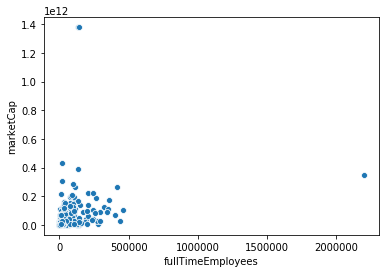

In [10]:
sns.scatterplot(data = div_df,x=div_df['fullTimeEmployees'],y=div_df['marketCap'])

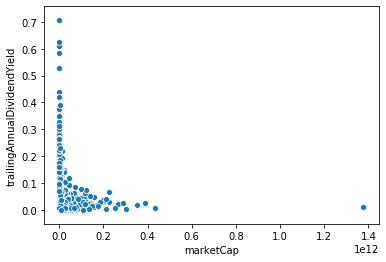

In [11]:
sns.scatterplot(data = div_df,x=div_df['marketCap'],y=div_df['trailingAnnualDividendYield'])

In [12]:
div_df['etf'].unique()

array(['N'], dtype=object)

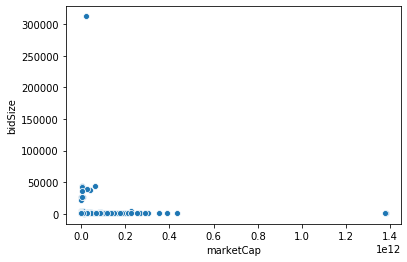

In [13]:
sns.scatterplot(data = div_df,x=div_df['marketCap'],y=div_df['bidSize'])

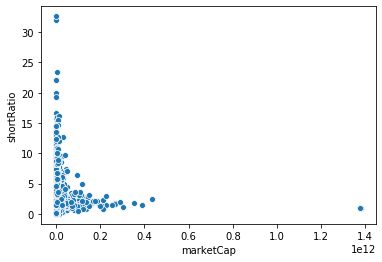

In [14]:
sns.scatterplot(data = div_df,x=div_df['marketCap'],y=div_df['shortRatio'])

In [15]:
div_df.isna().sum()

symbol                           0
security_name                    0
listing_exchange                 0
etf                              0
zip                             20
sector                          13
fullTimeEmployees              569
city                             2
state                          157
country                          0
industry                        13
twoHundredDayAverage             0
trailingAnnualDividendYield    170
averageDailyVolume10Day          0
regularMarketPreviousClose       0
open                             0
averageVolume10days              0
dividendRate                     0
regularMarketVolume              0
marketCap                       17
averageVolume                    0
dayLow                           0
ask                              0
fiftyTwoWeekHigh                 0
forwardPE                      588
fiveYearAvgDividendYield       428
dividendYield                    1
bidSize                          0
dayHigh             

In [16]:
# Remove outliers from dataset

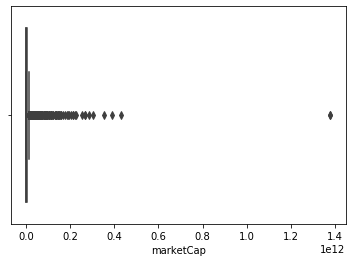

In [17]:
sns.boxplot(x= div_df['marketCap'])

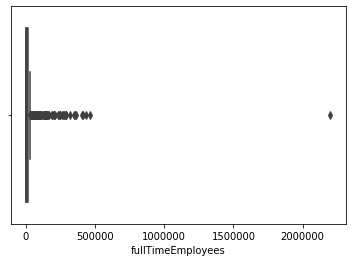

In [18]:
sns.boxplot(x= div_df['fullTimeEmployees'])

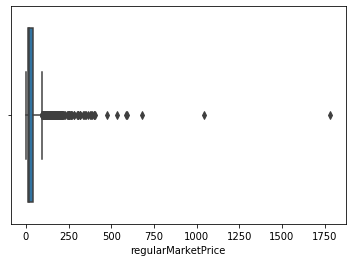

In [19]:
sns.boxplot(x= div_df['regularMarketPrice'])

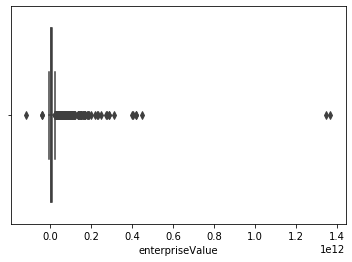

In [20]:
sns.boxplot(x= div_df['enterpriseValue'])

In [21]:
# One thing I may think of doing is filling in the null values with data before removing outliers.

In [22]:
# Get max and min full time employees
print(div_df['fullTimeEmployees'].min())
print(div_df['fullTimeEmployees'].max())

1.0
2200000.0


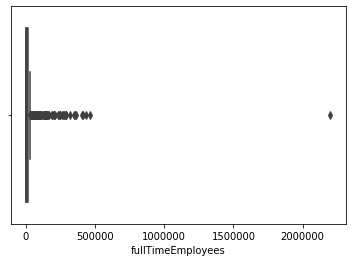

In [23]:
sns.boxplot(x= div_df['fullTimeEmployees'])

In [24]:
div_df = div_df[div_df.fullTimeEmployees != 2200000]

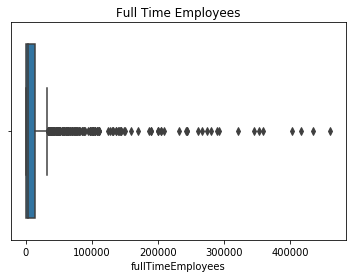

In [25]:
sns.boxplot(x= div_df['fullTimeEmployees']);
plt.title('Full Time Employees');

In [26]:
div_df['fullTimeEmployees'].fillna(value=np.random.uniform(1,100000), inplace=True)

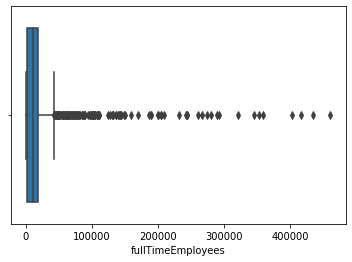

In [27]:
sns.boxplot(x= div_df['fullTimeEmployees'])

In [28]:
iqr(div_df['fullTimeEmployees'])

16537.914145951938

In [29]:
div_df['fullTimeEmployees'].describe()

count      1938.000000
mean      17613.753431
std       37816.454084
min           1.000000
25%        1300.000000
50%       10500.000000
75%       17837.914146
max      460724.000000
Name: fullTimeEmployees, dtype: float64

In [30]:
# Outliers = Observations > Q3 + 1.5*IQR  or  Q1 – 1.5*IQR

In [31]:
Q1fte = div_df['fullTimeEmployees'].quantile(0.25)
Q3fte = div_df['fullTimeEmployees'].quantile(0.75)
IQR = Q3fte-Q1fte

In [32]:
# Find a way to group companies by size

In [33]:
div_df.head()

,symbol,security_name,listing_exchange,etf,zip,sector,fullTimeEmployees,city,state,country,...,dayHigh,enterpriseToRevenue,forwardEps,bookValue,sharesShort,shortRatio,floatShares,enterpriseValue,regularMarketPrice,latest_dividend
0,A,"Agilent Technologies, Inc. Common Stock",N,N,95051,Healthcare,16300.0,Santa Clara,CA,United States,...,86.48,4.987,3.57,15.636,5258241.0,2.55,3.085180e+08,2.611031e+10,86.30,0.18
1,AAL,"American Airlines Group, Inc. - Common Stock",Q,N,76155,Industrials,131500.0,Fort Worth,TX,United States,...,12.55,0.796,-0.04,-6.233,119303588.0,1.49,4.167541e+08,3.478515e+10,12.43,0.10
2,AAP,Advance Auto Parts Inc Advance Auto Parts Inc W/I,N,N,27604,Consumer Cyclical,39000.0,Raleigh,NC,United States,...,141.78,1.175,8.54,51.606,1691705.0,1.57,6.857524e+07,1.141075e+10,137.50,0.25
3,AAPL,Apple Inc. - Common Stock,Q,N,95014,Technology,137000.0,Cupertino,CA,United States,...,318.71,5.108,14.73,18.137,33592445.0,0.89,4.329827e+09,1.368917e+12,316.14,0.82
4,AAT,"American Assets Trust, Inc. Common Stock",N,N,92130,Real Estate,205.0,San Diego,CA,United States,...,28.52,7.849,1.35,21.713,706006.0,1.70,5.308802e+07,2.936203e+09,28.01,0.30


In [34]:
div_df['sector'].value_counts()

Financial Services        879
Industrials               214
Real Estate               170
Energy                    121
Consumer Cyclical         108
Technology                107
Basic Materials            95
Utilities                  68
Consumer Defensive         68
Healthcare                 49
Communication Services     45
Financial                   1
Name: sector, dtype: int64

In [35]:
company_size_key = {'small': 100 ,'medium': 1000 , 'large': 1000000}

In [36]:
div_df.head()

,symbol,security_name,listing_exchange,etf,zip,sector,fullTimeEmployees,city,state,country,...,dayHigh,enterpriseToRevenue,forwardEps,bookValue,sharesShort,shortRatio,floatShares,enterpriseValue,regularMarketPrice,latest_dividend
0,A,"Agilent Technologies, Inc. Common Stock",N,N,95051,Healthcare,16300.0,Santa Clara,CA,United States,...,86.48,4.987,3.57,15.636,5258241.0,2.55,3.085180e+08,2.611031e+10,86.30,0.18
1,AAL,"American Airlines Group, Inc. - Common Stock",Q,N,76155,Industrials,131500.0,Fort Worth,TX,United States,...,12.55,0.796,-0.04,-6.233,119303588.0,1.49,4.167541e+08,3.478515e+10,12.43,0.10
2,AAP,Advance Auto Parts Inc Advance Auto Parts Inc W/I,N,N,27604,Consumer Cyclical,39000.0,Raleigh,NC,United States,...,141.78,1.175,8.54,51.606,1691705.0,1.57,6.857524e+07,1.141075e+10,137.50,0.25
3,AAPL,Apple Inc. - Common Stock,Q,N,95014,Technology,137000.0,Cupertino,CA,United States,...,318.71,5.108,14.73,18.137,33592445.0,0.89,4.329827e+09,1.368917e+12,316.14,0.82
4,AAT,"American Assets Trust, Inc. Common Stock",N,N,92130,Real Estate,205.0,San Diego,CA,United States,...,28.52,7.849,1.35,21.713,706006.0,1.70,5.308802e+07,2.936203e+09,28.01,0.30


In [37]:
div_df['newcol'] = div_df['fullTimeEmployees']

In [38]:
div_df.head()

,symbol,security_name,listing_exchange,etf,zip,sector,fullTimeEmployees,city,state,country,...,enterpriseToRevenue,forwardEps,bookValue,sharesShort,shortRatio,floatShares,enterpriseValue,regularMarketPrice,latest_dividend,newcol
0,A,"Agilent Technologies, Inc. Common Stock",N,N,95051,Healthcare,16300.0,Santa Clara,CA,United States,...,4.987,3.57,15.636,5258241.0,2.55,3.085180e+08,2.611031e+10,86.30,0.18,16300.0
1,AAL,"American Airlines Group, Inc. - Common Stock",Q,N,76155,Industrials,131500.0,Fort Worth,TX,United States,...,0.796,-0.04,-6.233,119303588.0,1.49,4.167541e+08,3.478515e+10,12.43,0.10,131500.0
2,AAP,Advance Auto Parts Inc Advance Auto Parts Inc W/I,N,N,27604,Consumer Cyclical,39000.0,Raleigh,NC,United States,...,1.175,8.54,51.606,1691705.0,1.57,6.857524e+07,1.141075e+10,137.50,0.25,39000.0
3,AAPL,Apple Inc. - Common Stock,Q,N,95014,Technology,137000.0,Cupertino,CA,United States,...,5.108,14.73,18.137,33592445.0,0.89,4.329827e+09,1.368917e+12,316.14,0.82,137000.0
4,AAT,"American Assets Trust, Inc. Common Stock",N,N,92130,Real Estate,205.0,San Diego,CA,United States,...,7.849,1.35,21.713,706006.0,1.70,5.308802e+07,2.936203e+09,28.01,0.30,205.0


In [39]:
div_df['size'] = div_df['newcol']

In [40]:
div_df.shape

(1938, 40)

In [41]:
div_df[div_df['size']<100].shape

(97, 40)

# Seperating Companies by Size

In [42]:
small = div_df[div_df['size']<100]

In [43]:
medium = div_df[(div_df['size']>=100)&(div_df['size']<999)]

In [44]:
large = div_df[div_df['size']>999]

In [45]:
print(small.shape)
print(medium.shape)
print(large.shape)

(97, 40)
(343, 40)
(1498, 40)


In [46]:
small.head()

,symbol,security_name,listing_exchange,etf,zip,sector,fullTimeEmployees,city,state,country,...,forwardEps,bookValue,sharesShort,shortRatio,floatShares,enterpriseValue,regularMarketPrice,latest_dividend,newcol,size
12,AC,"Associated Capital Group, Inc. Common Stock",N,N,10580,Financial Services,39.0,Rye,NY,United States,...,2.59,36.611,196192.0,10.61,3337299.0,4.792149e+08,42.11,0.100,39.0,39.0
23,ADC,Agree Realty Corporation Common Stock,N,N,48304,Real Estate,41.0,Bloomfield Hills,MI,United States,...,1.76,37.483,7650448.0,8.52,45892725.0,4.230171e+09,66.35,0.585,41.0,41.0
47,AGNC,AGNC Investment Corp. - Common Stock,Q,N,20814,Real Estate,51.0,Bethesda,MD,United States,...,1.91,14.636,13832623.0,1.00,555558553.0,6.859663e+10,13.61,0.120,51.0,51.0
48,AGNCM,AGNC Investment Corp. - Depositary Shares rep ...,Q,N,20814,Real Estate,51.0,Bethesda,MD,United States,...,NaN,14.636,NaN,NaN,555558553.0,7.422655e+10,22.72,0.430,51.0,51.0
49,AGNCN,AGNC Investment Corp. - Depositary Shares Each...,Q,N,20814,Real Estate,51.0,Bethesda,MD,United States,...,NaN,14.636,NaN,NaN,555558553.0,7.453420e+10,23.44,0.438,51.0,51.0


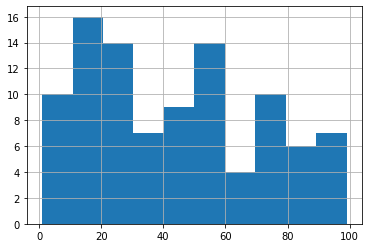

In [47]:
small['fullTimeEmployees'].hist()

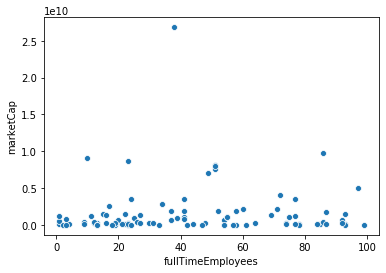

In [48]:
sns.scatterplot(data = small, x= small['fullTimeEmployees'],y=small['marketCap'])

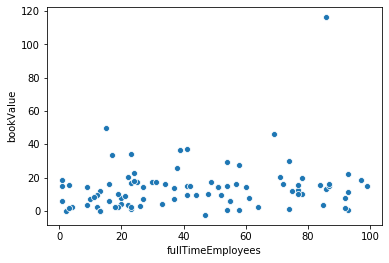

In [49]:
sns.scatterplot(data = small, x= small['fullTimeEmployees'],y=small['bookValue'])

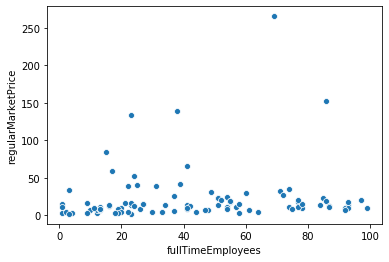

In [50]:
sns.scatterplot(data = small, x= small['fullTimeEmployees'],y=small['regularMarketPrice'])

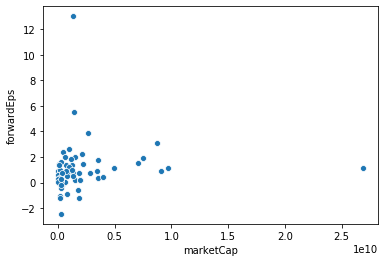

In [51]:
sns.scatterplot(data = small, x= small['marketCap'],y=small['forwardEps'])

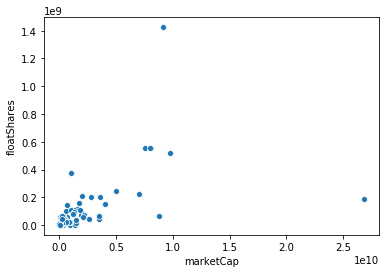

In [52]:
sns.scatterplot(data = small, x= small['marketCap'],y=small['floatShares'])

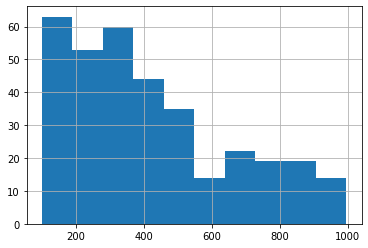

In [53]:
medium['fullTimeEmployees'].hist()

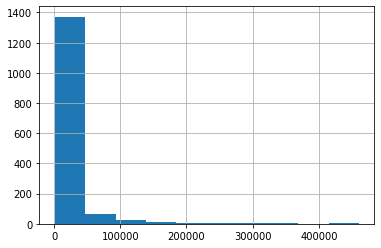

In [54]:
large['fullTimeEmployees'].hist()

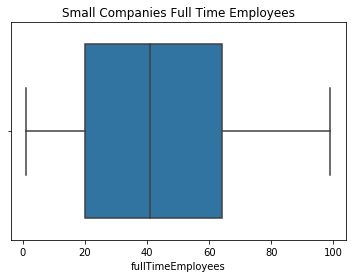

In [55]:
sns.boxplot(x= small['fullTimeEmployees']);
plt.title('Small Companies Full Time Employees');

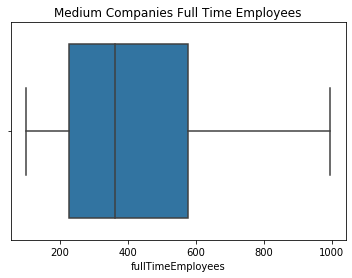

In [56]:
sns.boxplot(x= medium['fullTimeEmployees'])
plt.title('Medium Companies Full Time Employees');

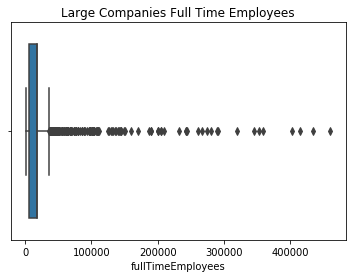

In [57]:
sns.boxplot(x= large['fullTimeEmployees'])
plt.title('Large Companies Full Time Employees');

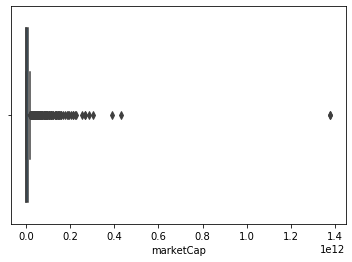

In [58]:
sns.boxplot(x= large['marketCap'])

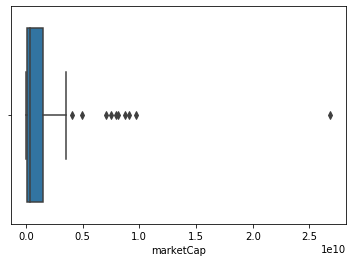

In [59]:
sns.boxplot(x= small['marketCap'])

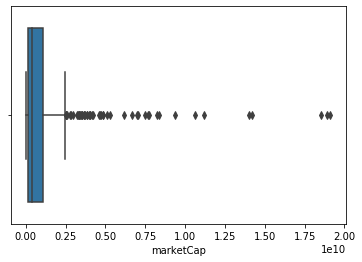

In [60]:
sns.boxplot(x= medium['marketCap'])

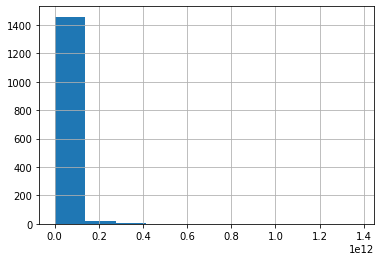

In [61]:
large['marketCap'].hist()

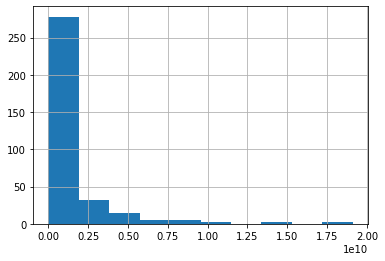

In [62]:
medium['marketCap'].hist()

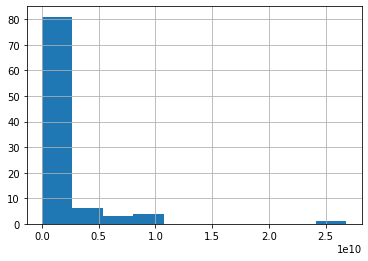

In [63]:
small['marketCap'].hist()

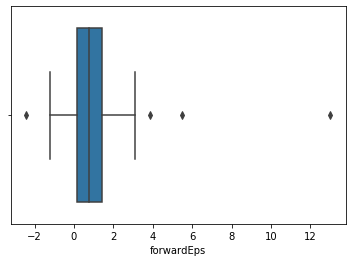

In [64]:
sns.boxplot(x= small['forwardEps'])

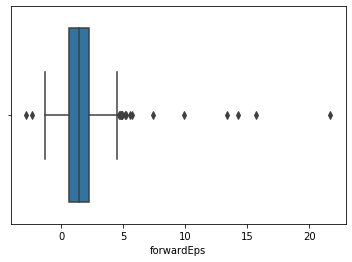

In [65]:
sns.boxplot(x= medium['forwardEps'])

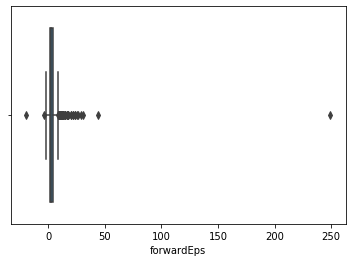

In [66]:
sns.boxplot(x= large['forwardEps'])

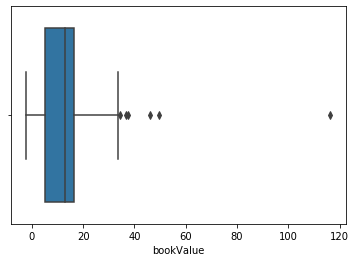

In [67]:
sns.boxplot(x= small['bookValue'])

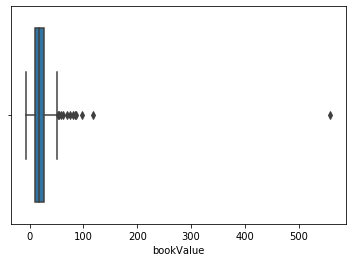

In [68]:
sns.boxplot(x= medium['bookValue'])

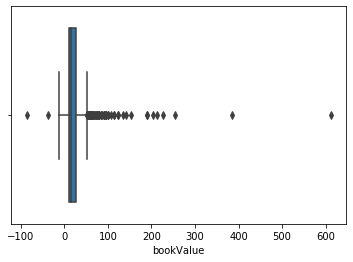

In [69]:
sns.boxplot(x= large['bookValue'])

In [70]:
small.head()

,symbol,security_name,listing_exchange,etf,zip,sector,fullTimeEmployees,city,state,country,...,forwardEps,bookValue,sharesShort,shortRatio,floatShares,enterpriseValue,regularMarketPrice,latest_dividend,newcol,size
12,AC,"Associated Capital Group, Inc. Common Stock",N,N,10580,Financial Services,39.0,Rye,NY,United States,...,2.59,36.611,196192.0,10.61,3337299.0,4.792149e+08,42.11,0.100,39.0,39.0
23,ADC,Agree Realty Corporation Common Stock,N,N,48304,Real Estate,41.0,Bloomfield Hills,MI,United States,...,1.76,37.483,7650448.0,8.52,45892725.0,4.230171e+09,66.35,0.585,41.0,41.0
47,AGNC,AGNC Investment Corp. - Common Stock,Q,N,20814,Real Estate,51.0,Bethesda,MD,United States,...,1.91,14.636,13832623.0,1.00,555558553.0,6.859663e+10,13.61,0.120,51.0,51.0
48,AGNCM,AGNC Investment Corp. - Depositary Shares rep ...,Q,N,20814,Real Estate,51.0,Bethesda,MD,United States,...,NaN,14.636,NaN,NaN,555558553.0,7.422655e+10,22.72,0.430,51.0,51.0
49,AGNCN,AGNC Investment Corp. - Depositary Shares Each...,Q,N,20814,Real Estate,51.0,Bethesda,MD,United States,...,NaN,14.636,NaN,NaN,555558553.0,7.453420e+10,23.44,0.438,51.0,51.0


In [71]:
llm = large.groupby('sector').agg({'marketCap':'mean'}).reset_index()

In [72]:
llm = llm.sort_values(by='marketCap',ascending=False)

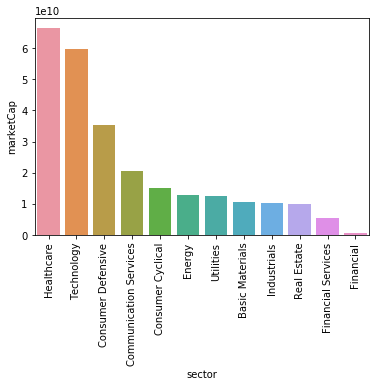

In [73]:
sns.barplot(x=llm['sector'], y= llm['marketCap']);
plt.xticks(rotation=90);

In [74]:
lfe = large.groupby('sector').agg({'fullTimeEmployees':'mean'}).reset_index()

In [75]:
lfe = lfe.sort_values(by='fullTimeEmployees',ascending=False)

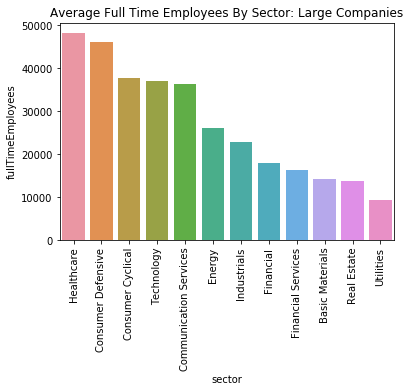

In [76]:
sns.barplot(x=lfe['sector'], y= lfe['fullTimeEmployees']);
plt.xticks(rotation=90);
plt.title('Average Full Time Employees By Sector: Large Companies');

In [77]:
mfe = medium.groupby('sector').agg({'fullTimeEmployees':'mean'}).reset_index()

In [78]:
mfe = mfe.sort_values(by='fullTimeEmployees',ascending=False)

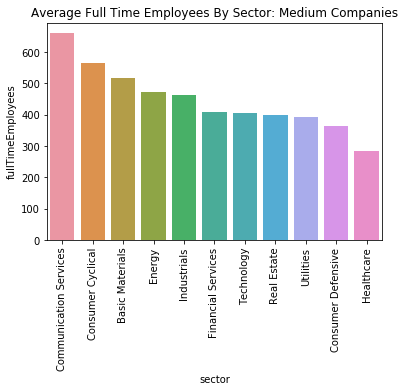

In [79]:
sns.barplot(x=mfe['sector'], y= mfe['fullTimeEmployees']);
plt.xticks(rotation=90);
plt.title('Average Full Time Employees By Sector: Medium Companies');

In [80]:
sgrouped = small.groupby('sector').agg({'fullTimeEmployees':'mean'}).reset_index()

In [81]:
sgrouped.head()

,sector,fullTimeEmployees
0,Basic Materials,41.666667
1,Communication Services,85.000000
2,Consumer Cyclical,58.000000
3,Consumer Defensive,23.000000
4,Energy,24.857143


In [82]:
sgrouped = sgrouped.sort_values(by='fullTimeEmployees', ascending=False)

In [83]:
sgrouped

,sector,fullTimeEmployees
6,Healthcare,93.000000
1,Communication Services,85.000000
10,Utilities,74.000000
5,Financial Services,60.782609
2,Consumer Cyclical,58.000000
0,Basic Materials,41.666667
8,Real Estate,39.226415
4,Energy,24.857143
3,Consumer Defensive,23.000000
7,Industrials,20.000000


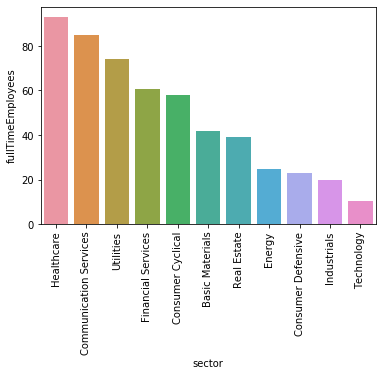

In [84]:
sns.barplot(x=sgrouped['sector'],y=sgrouped['fullTimeEmployees']);
plt.xticks(rotation = 90);

In [85]:
div_df.head()

,symbol,security_name,listing_exchange,etf,zip,sector,fullTimeEmployees,city,state,country,...,forwardEps,bookValue,sharesShort,shortRatio,floatShares,enterpriseValue,regularMarketPrice,latest_dividend,newcol,size
0,A,"Agilent Technologies, Inc. Common Stock",N,N,95051,Healthcare,16300.0,Santa Clara,CA,United States,...,3.57,15.636,5258241.0,2.55,3.085180e+08,2.611031e+10,86.30,0.18,16300.0,16300.0
1,AAL,"American Airlines Group, Inc. - Common Stock",Q,N,76155,Industrials,131500.0,Fort Worth,TX,United States,...,-0.04,-6.233,119303588.0,1.49,4.167541e+08,3.478515e+10,12.43,0.10,131500.0,131500.0
2,AAP,Advance Auto Parts Inc Advance Auto Parts Inc W/I,N,N,27604,Consumer Cyclical,39000.0,Raleigh,NC,United States,...,8.54,51.606,1691705.0,1.57,6.857524e+07,1.141075e+10,137.50,0.25,39000.0,39000.0
3,AAPL,Apple Inc. - Common Stock,Q,N,95014,Technology,137000.0,Cupertino,CA,United States,...,14.73,18.137,33592445.0,0.89,4.329827e+09,1.368917e+12,316.14,0.82,137000.0,137000.0
4,AAT,"American Assets Trust, Inc. Common Stock",N,N,92130,Real Estate,205.0,San Diego,CA,United States,...,1.35,21.713,706006.0,1.70,5.308802e+07,2.936203e+09,28.01,0.30,205.0,205.0


In [86]:
lbv = large.groupby('sector').agg({'bookValue':'mean'}).reset_index()

In [87]:
lbv = lbv.sort_values(by='bookValue',ascending=False)

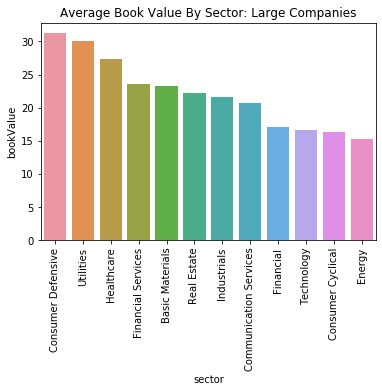

In [88]:
sns.barplot(x=lbv['sector'], y= lbv['bookValue']);
plt.xticks(rotation=90);
plt.title('Average Book Value By Sector: Large Companies');

In [89]:
mbv = medium.groupby('sector').agg({'bookValue':'mean'}).reset_index()

In [90]:
mbv = mbv.sort_values(by='bookValue',ascending=False)

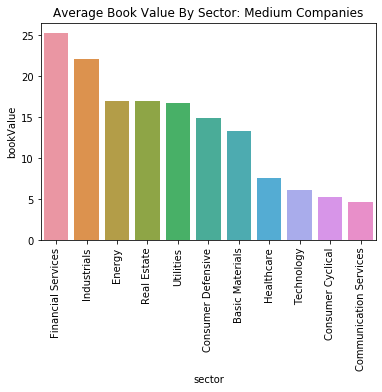

In [91]:
sns.barplot(x=mbv['sector'], y= mbv['bookValue']);
plt.xticks(rotation=90);
plt.title('Average Book Value By Sector: Medium Companies');

In [92]:
sbv = small.groupby('sector').agg({'bookValue':'mean'}).reset_index()

In [93]:
sbv = sbv.sort_values(by='bookValue',ascending=False)

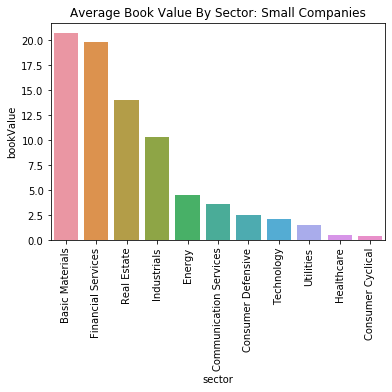

In [94]:
sns.barplot(x=sbv['sector'], y= sbv['bookValue']);
plt.xticks(rotation=90);
plt.title('Average Book Value By Sector: Small Companies');

In [95]:
small.head()

,symbol,security_name,listing_exchange,etf,zip,sector,fullTimeEmployees,city,state,country,...,forwardEps,bookValue,sharesShort,shortRatio,floatShares,enterpriseValue,regularMarketPrice,latest_dividend,newcol,size
12,AC,"Associated Capital Group, Inc. Common Stock",N,N,10580,Financial Services,39.0,Rye,NY,United States,...,2.59,36.611,196192.0,10.61,3337299.0,4.792149e+08,42.11,0.100,39.0,39.0
23,ADC,Agree Realty Corporation Common Stock,N,N,48304,Real Estate,41.0,Bloomfield Hills,MI,United States,...,1.76,37.483,7650448.0,8.52,45892725.0,4.230171e+09,66.35,0.585,41.0,41.0
47,AGNC,AGNC Investment Corp. - Common Stock,Q,N,20814,Real Estate,51.0,Bethesda,MD,United States,...,1.91,14.636,13832623.0,1.00,555558553.0,6.859663e+10,13.61,0.120,51.0,51.0
48,AGNCM,AGNC Investment Corp. - Depositary Shares rep ...,Q,N,20814,Real Estate,51.0,Bethesda,MD,United States,...,NaN,14.636,NaN,NaN,555558553.0,7.422655e+10,22.72,0.430,51.0,51.0
49,AGNCN,AGNC Investment Corp. - Depositary Shares Each...,Q,N,20814,Real Estate,51.0,Bethesda,MD,United States,...,NaN,14.636,NaN,NaN,555558553.0,7.453420e+10,23.44,0.438,51.0,51.0


In [96]:
small['country'].unique()

array(['United States', 'Bermuda', 'Canada', 'United Kingdom'],
      dtype=object)

In [97]:
cms = small.groupby('country').agg({'marketCap':'sum'}).reset_index()

In [98]:
cms = cms.sort_values(by = 'marketCap', ascending=False)

In [99]:
cms

,country,marketCap
3,United States,1.236481e+11
1,Canada,2.728798e+10
0,Bermuda,2.311454e+09
2,United Kingdom,4.902350e+08


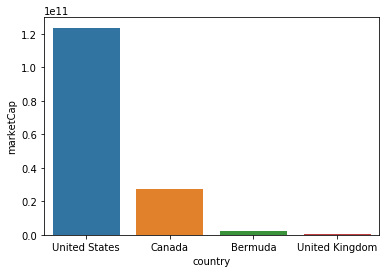

In [100]:
sns.barplot(x=cms['country'], y= cms['marketCap'])

In [101]:
cmsmed = medium.groupby('country').agg({'marketCap':'sum'}).reset_index()

In [102]:
cmsmed = cmsmed.sort_values(by = 'marketCap', ascending=False)

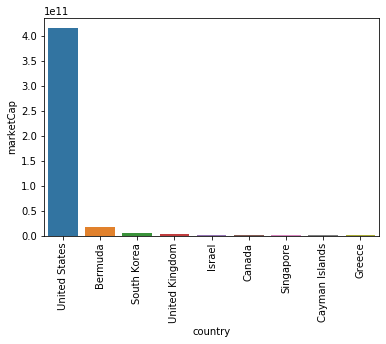

In [103]:
sns.barplot(x=cmsmed['country'], y= cmsmed['marketCap']);
plt.xticks(rotation=90);

In [104]:
cmslarge = large.groupby('country').agg({'marketCap':'sum'}).reset_index()

In [105]:
cmslarge = cmslarge.sort_values(by = 'marketCap', ascending=False)

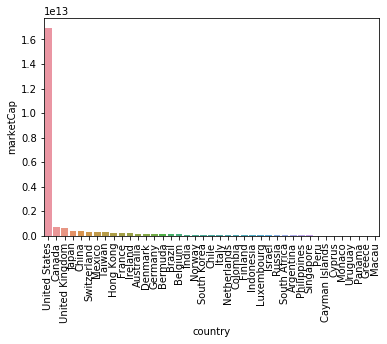

In [106]:
sns.barplot(x=cmslarge['country'], y= cmslarge['marketCap']);
plt.xticks(rotation=90);

In [107]:
cmsector = small.groupby(['country','sector']).agg({'marketCap':'mean'}).reset_index()

In [108]:
cmsector = cmsector.sort_values(by = 'marketCap', ascending=False)

In [109]:
cmsector.head()

,country,sector,marketCap
2,Canada,Basic Materials,2.683160e+10
5,United States,Basic Materials,4.517857e+09
12,United States,Real Estate,2.108176e+09
1,Bermuda,Industrials,7.115783e+08
4,United Kingdom,Industrials,4.902350e+08


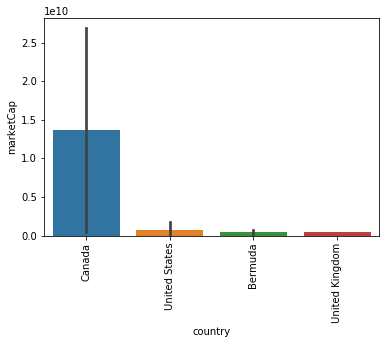

In [110]:
sns.barplot(x=cmsector['country'], y= cmsector['marketCap']);
plt.xticks(rotation=90);